<a href="https://colab.research.google.com/github/simonastojev/applications_of_ml_alg/blob/main/Prvi_doma%C4%87i_zadatak_%E2%80%93_QM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prvi domaći zadatak – RFM analiza (segmentacija) i klasterovanje

## Prvi deo – učitavanje, sređivanje podataka i pravljanje pivot tabela

In [9]:
# Uvoz biblioteka

import numpy as np
import pandas as pd

In [10]:
# Učitavanje transakcija

df_transactions = pd.read_csv("trans.csv", low_memory = False)
df_transactions.head()

# Pregled tabele sa transakcijama

df_transactions.shape
df_transactions.info()
df_transactions.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  object 
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  float64
 6   balance     1056320 non-null  float64
 7   k_symbol    574439 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 80.6+ MB


trans_id        int64
account_id      int64
date           object
type           object
operation      object
amount        float64
balance       float64
k_symbol       object
bank           object
account       float64
dtype: object

In [11]:
df_transactions.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,2017-09-10 03:24:33,INCOME,DEPOSIT,700.0,700.0,NaN,NaN,NaN
1,171812,576,2017-09-14 03:24:33,INCOME,DEPOSIT,900.0,900.0,NaN,NaN,NaN
2,207264,704,2017-09-21 03:24:33,INCOME,DEPOSIT,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,2017-09-06 03:24:33,INCOME,DEPOSIT,600.0,600.0,NaN,NaN,NaN
4,579373,1972,2017-09-19 03:41:13,INCOME,DEPOSIT,400.0,400.0,NaN,NaN,NaN


In [12]:
# Učitavanje skupa korisnika i njihovih računa

df_client_accounts = pd.read_csv ('client_accounts.csv', low_memory = False)
df_client_accounts.head()

,account_id,client_id
0,1,1
1,2,2
2,3,2
3,4,3
4,5,3


### Spajanje tabela

In [13]:
df = pd.merge(df_transactions, df_client_accounts, on = "account_id", how = "left")
df.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,client_id
0,695247,2378,2017-09-10 03:24:33,INCOME,DEPOSIT,700.0,700.0,NaN,NaN,NaN,1956.0
1,171812,576,2017-09-14 03:24:33,INCOME,DEPOSIT,900.0,900.0,NaN,NaN,NaN,478.0
2,207264,704,2017-09-21 03:24:33,INCOME,DEPOSIT,1000.0,1000.0,NaN,NaN,NaN,586.0
3,1117247,3818,2017-09-06 03:24:33,INCOME,DEPOSIT,600.0,600.0,NaN,NaN,NaN,3158.0
4,579373,1972,2017-09-19 03:41:13,INCOME,DEPOSIT,400.0,400.0,NaN,NaN,NaN,1627.0


In [14]:
num_unique_accounts = len(df["account_id"].unique())
print("Broj različitih računa koje klijent poseduje: ", num_unique_accounts)

Broj različitih računa koje klijent poseduje:  4500


#### Pravljenje pivot tabela

In [15]:
pivot_type = df.pivot_table(values = "amount", index = "account_id", columns = "type", aggfunc = "sum")
pivot_type.isna().sum()

type
CHOICE         3356
EXPENDITURE       0
INCOME            0
dtype: int64

In [16]:
# Popunjavanje nedostajućih vrednosti medijanom

In [17]:
pivot_type.fillna(pivot_type['CHOICE'].median(), inplace = True)
pivot_type.head()

type,CHOICE,EXPENDITURE,INCOME
account_id,,,
1,151407.5,180854.0,194320.5
2,217442.0,1336983.8,1597053.5
3,151407.5,121962.8,173059.0
4,151407.5,158625.4,192346.0
5,151407.5,69396.4,97485.0


In [18]:
pivot_operation = df.pivot_table(values = "amount", index = "account_id", columns = "operation", aggfunc = "sum")
pivot_operation.isna().sum()

operation
ACCOUNT TRANSFER          898
CARD                     3693
CHOICE                      0
DEPOSIT                     0
TRANSFER FROM ACCOUNT    2894
dtype: int64

In [19]:
pivot_operation.fillna(pivot_operation['ACCOUNT TRANSFER'].median(), inplace = True)
pivot_operation.fillna(pivot_operation['CARD'].median(), inplace = True)
pivot_operation.fillna(pivot_operation['TRANSFER FROM ACCOUNT'].median(), inplace = True)

In [20]:
# Spajanje pivot tabela za klasterovanje

m_for_clustering = pd.concat([pivot_type, pivot_operation], axis = 1)
print(m_for_clustering.isna().sum())
m_for_clustering.tail()

CHOICE                   0
EXPENDITURE              0
INCOME                   0
ACCOUNT TRANSFER         0
CARD                     0
CHOICE                   0
DEPOSIT                  0
TRANSFER FROM ACCOUNT    0
dtype: int64


,CHOICE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE,DEPOSIT,TRANSFER FROM ACCOUNT
account_id,,,,,,,,
11333,401063.0,1217674.9,1677057.6,140330.5,140330.5,1618737.9,1660195.0,140330.5
11349,229379.0,1732318.0,1995675.2,690478.0,140330.5,1271219.0,14800.0,1973436.0
11359,29529.0,1406911.2,1511641.2,273539.6,57400.0,1105500.6,4000.0,1499277.0
11362,151407.5,645739.8,684270.7,309438.0,140330.5,336301.8,680055.0,140330.5
11382,212412.0,1058331.4,1352418.5,140330.5,140330.5,1270743.4,200.0,1341192.0


## RFM zadatak – segmentacija tržišta

In [22]:
df.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,client_id
0,695247,2378,2017-09-10 03:24:33,INCOME,DEPOSIT,700.0,700.0,NaN,NaN,NaN,1956.0
1,171812,576,2017-09-14 03:24:33,INCOME,DEPOSIT,900.0,900.0,NaN,NaN,NaN,478.0
2,207264,704,2017-09-21 03:24:33,INCOME,DEPOSIT,1000.0,1000.0,NaN,NaN,NaN,586.0
3,1117247,3818,2017-09-06 03:24:33,INCOME,DEPOSIT,600.0,600.0,NaN,NaN,NaN,3158.0
4,579373,1972,2017-09-19 03:41:13,INCOME,DEPOSIT,400.0,400.0,NaN,NaN,NaN,1627.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056320 entries, 0 to 1056319
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  object 
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  float64
 6   balance     1056320 non-null  float64
 7   k_symbol    574439 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64
 10  client_id   877282 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 96.7+ MB


In [24]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056320 entries, 0 to 1056319
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   trans_id    1056320 non-null  int64         
 1   account_id  1056320 non-null  int64         
 2   date        1056320 non-null  datetime64[ns]
 3   type        1056320 non-null  object        
 4   operation   873206 non-null   object        
 5   amount      1056320 non-null  float64       
 6   balance     1056320 non-null  float64       
 7   k_symbol    574439 non-null   object        
 8   bank        273508 non-null   object        
 9   account     295389 non-null   float64       
 10  client_id   877282 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 96.7+ MB


<AxesSubplot:>

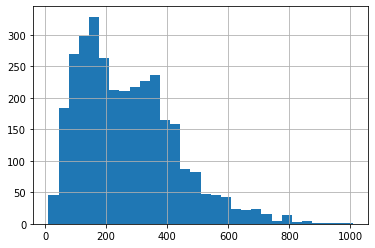

In [25]:
%matplotlib inline

trans_client_count = df.groupby('client_id')['trans_id'].count()
trans_client_count.hist(bins = 30)

In [26]:
df_rfm_custs = df.groupby('client_id').agg({'date': 'max', 'amount': ['sum', 'count'] })
df_rfm_custs.columns = ['-'.join(x) for x in df_rfm_custs.columns]
df_rfm_custs.index = df_rfm_custs.index.astype(int)
df_rfm_custs.head()

max_date = df_rfm_custs['date-max'].max()
max_date

Timestamp('2019-05-09 21:11:13')

In [27]:
df_rfm_custs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3239 entries, 1 to 9227
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date-max      3239 non-null   datetime64[ns]
 1   amount-sum    3239 non-null   float64       
 2   amount-count  3239 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 101.2 KB


In [28]:
from datetime import datetime, timedelta

today = datetime.strptime('2019-05-10', '%Y-%m-%d')

In [29]:
df_rfm_custs['diff_date'] = df_rfm_custs['date-max'].apply(lambda x: (today - x).seconds/60)

In [30]:
df_rfm_custs.head()

,date-max,amount-sum,amount-count,diff_date
client_id,,,,
1,2019-05-08 13:57:53,375174.5,239,602.116667
2,2019-05-09 16:44:33,3446501.1,595,435.450000
3,2019-05-08 14:37:53,517852.8,270,562.116667
4,2019-05-06 15:37:53,647567.1,246,502.116667
5,2019-05-05 14:14:33,1192039.9,130,585.450000


In [31]:
df_rfm_custs['diff_date'] = 1/df_rfm_custs['diff_date']

df_rfm_custs['Recency'] = pd.qcut(df_rfm_custs['diff_date'], q = 5, labels = False) + 1
df_rfm_custs['Frequency'] = pd.qcut(df_rfm_custs['amount-count'], q = 5, labels = False) + 1
df_rfm_custs['Monetary'] = pd.qcut(df_rfm_custs['amount-sum'], q = 5, labels = False) + 1
df_rfm_custs['RFM'] = df_rfm_custs[['Recency', 'Frequency', 'Monetary']].agg('prod', axis = 1)
df_rfm_custs['RFM Cluster'] = pd.cut(df_rfm_custs['RFM'], bins = [0, 2, 9, 30, 60, 100], labels = False) + 1
df_rfm_custs.groupby('RFM Cluster')[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'max', 'min'])

df_rfm_custs.head(20)

,date-max,amount-sum,amount-count,diff_date,Recency,Frequency,Monetary,RFM,RFM Cluster
client_id,,,,,,,,,
1,2019-05-08 13:57:53,375174.5,239,0.001661,2,3,1,6,2.0
2,2019-05-09 16:44:33,3446501.1,595,0.002296,3,5,5,75,5.0
3,2019-05-08 14:37:53,517852.8,270,0.001779,2,3,2,12,3.0
4,2019-05-06 15:37:53,647567.1,246,0.001992,3,3,2,18,3.0
5,2019-05-05 14:14:33,1192039.9,130,0.001708,2,2,3,12,3.0
6,2019-05-06 13:37:53,1712906.1,254,0.001607,2,3,4,24,3.0
7,2019-05-08 17:07:53,696434.1,361,0.002426,4,4,2,32,4.0
8,2019-05-07 17:07:53,1298705.2,342,0.002426,4,4,3,48,4.0
9,2019-05-06 04:51:13,216751.3,106,0.000870,1,1,1,1,1.0


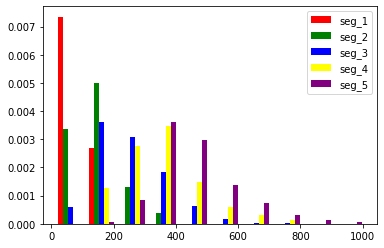

In [32]:
import matplotlib.pyplot as plt

seg_1 = list(df_rfm_custs[df_rfm_custs['RFM Cluster'] == 1]['amount-count'])
seg_2 = list(df_rfm_custs[df_rfm_custs['RFM Cluster'] == 2]['amount-count'])
seg_3 = list(df_rfm_custs[df_rfm_custs['RFM Cluster'] == 3]['amount-count'])
seg_4 = list(df_rfm_custs[df_rfm_custs['RFM Cluster'] == 4]['amount-count'])
seg_5 = list(df_rfm_custs[df_rfm_custs['RFM Cluster'] == 5]['amount-count'])

plt.hist([seg_1, seg_2, seg_3, seg_4, seg_5], density = True,  
         color = ['red', 'green', 'blue', 'yellow', 'purple'], 
         label = ['seg_1', 'seg_2', 'seg_3', 'seg_4','seg_5'])
plt.legend()
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [33]:
def rfm_group_mapping(R, F, M):
    
        if(R == 1 ) & (M == 1) & (F == 1):
            return "Bad customers"
        elif(R <= 2) & (M <= 2) & (F <= 2):
            return "Customers at risk"
        elif( 2 <= R <= 3) & (M <= 3) & (F <= 3):
            return "Average customers"
        elif(R == 4) & (3 <= M <= 4) & (3 <= F <= 4):
            return "Loyal customers"
        elif( R == 5) & (M == 5) & (F == 5):
            return "Winners"
        else: 
            return 'Other Customers (Transitional Level)'
    
df_rfm_custs['RFM Group'] = df_rfm_custs.apply(lambda x: rfm_group_mapping(x['Recency'], x['Frequency'], x['Monetary']), axis = 1)   
df_rfm_custs.tail()  

,date-max,amount-sum,amount-count,diff_date,Recency,Frequency,Monetary,RFM,RFM Cluster,RFM Group
client_id,,,,,,,,,,
9031,2019-05-08 17:07:53,1043600.7,146,0.002426,4,2,3,24,3.0,Other Customers (Transitional Level)
9156,2019-05-08 11:17:53,1045427.8,303,0.001312,1,4,3,12,3.0,Other Customers (Transitional Level)
9199,2019-05-08 15:54:33,559881.6,75,0.002060,3,1,2,6,2.0,Average customers
9225,2019-05-08 18:24:33,2948081.4,378,0.002981,4,4,5,80,5.0,Other Customers (Transitional Level)
9227,2019-05-08 11:34:33,1330010.5,344,0.001341,1,4,3,12,3.0,Other Customers (Transitional Level)


In [34]:
df_rfm_custs['RFM Group'].value_counts()

Other Customers (Transitional Level)    2262
Average customers                        388
Customers at risk                        300
Bad customers                            111
Loyal customers                          106
Winners                                   72
Name: RFM Group, dtype: int64

In [35]:
df_rfm_custs.groupby('RFM Group')[['amount-sum', 'amount-count', 'diff_date']].agg(['mean', 'std'])

amount-sum               amount-count  \
                                              mean           std         mean   
RFM Group                                                                       
Average customers                     6.457790e+05  3.488867e+05   174.981959   
Bad customers                         1.759431e+05  8.747522e+04    72.081081   
Customers at risk                     3.698907e+05  1.854627e+05   121.623333   
Loyal customers                       1.509041e+06  5.297668e+05   295.235849   
Other Customers (Transitional Level)  1.789340e+06  1.456099e+06   306.493369   
Winners                               4.225631e+06  1.556936e+06   559.972222   

                                                 diff_date            
                                             std      mean       std  
RFM Group                                                             
Average customers                      68.390482  0.001932  0.000214  
Bad customers                          31.312250  0.001141  0.000205  
Customers at risk                      45.489108  0.001505  0.000287  
Loyal customers                        60.721307  0.002483  0.000150  
Other Customers (Transitional Level)  154.780487  0.002801  0.001718  
Winners                               140.966780  0.005290  0.000976

## Klasterovanje

In [36]:
# Generisanje pivot tabele na drugačiji način (ručno), priprema podataka za normalizaciju

df1 = df.groupby('client_id')['account_id'].count().reset_index().rename(columns = {'account_id': 'account_count'})

temp = df[['client_id','type','amount']].groupby(['client_id','type']).sum('amount').reset_index()
df2 = temp.pivot('client_id', 'type', 'amount').reset_index().rename(columns = {'CHOICE': 'CHOICE_TYPE'})

temp = df[['client_id','operation','amount']].groupby(['client_id', 'operation']).sum('amount').reset_index()
df3 = temp.pivot('client_id', 'operation', 'amount').reset_index().rename(columns = {'CHOICE': 'CHOICE_OPERATION'})

df_clustering = df1.merge(df2, on = "client_id", how = "left").merge(df3, on = 'client_id', how = 'left')
df_clustering = df_clustering.fillna(df_clustering.mean())

print(df_clustering.shape)
df_clustering.head()

(3239, 10)


,client_id,account_count,CHOICE_TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE_OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT
0,1.0,239,181887.571429,180854.0,194320.5,98080.0,24157.401813,82774.0,25700.0,1.655550e+05
1,2.0,595,217442.000000,1458946.6,1770112.5,618247.8,24157.401813,1058140.8,219389.0,1.537936e+06
2,3.0,270,181887.571429,228021.8,289831.0,136164.0,24157.401813,91857.8,1400.0,2.841250e+05
3,4.0,246,181887.571429,299949.6,347617.5,185838.0,24157.401813,114111.6,900.0,3.401190e+05
4,5.0,130,181887.571429,561772.0,630267.9,97600.0,5900.000000,458272.0,623775.0,4.442851e+05


### Normalizacija podataka – 2 načina: MinMax and StandardScaler

In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax = MinMaxScaler()
df_min_max = minmax.fit_transform(df_clustering)  
# Dobili smo ndarray, moramo ponovo transformisati u df
df_min_max = pd.DataFrame(df_min_max, columns = df_clustering.columns)

standscale = StandardScaler()
df_stscale = standscale.fit_transform(df_clustering)
df_stscale = pd.DataFrame(df_stscale, columns = df_clustering.columns)

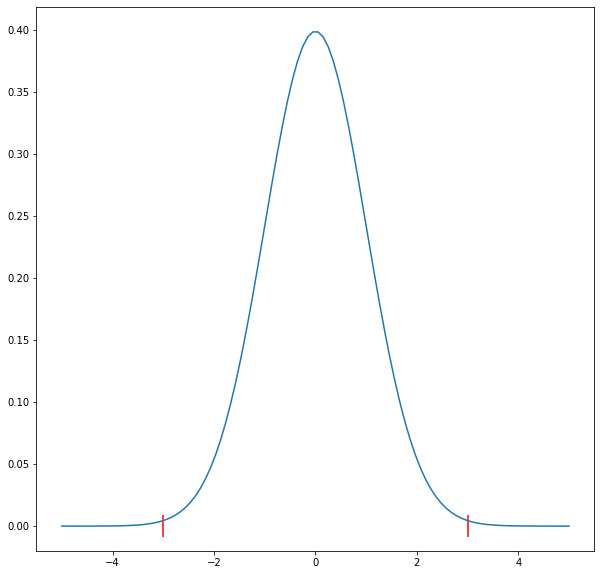

In [38]:
import math
import scipy.stats as stats
import matplotlib.pyplot as plt

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.scatter([3*sigma, -3*sigma], [0, 0], c = 'r', marker = '|', s = 500)
plt.show()

#### Traženje outlier-a: Z-score

In [39]:
from scipy import stats

In [40]:
z = np.abs(stats.zscore(df_stscale))
threshold = 3
print(np.where(z > 3))

(array([  12,   16,   16,   19,   23,   23,   25,   32,   35,   51,   51,
         51,   51,   52,   53,   53,   56,   64,   70,   71,   71,   71,
         71,   71,   78,   93,  134,  138,  146,  157,  157,  157,  157,
        157,  157,  164,  164,  169,  179,  199,  199,  199,  199,  217,
        217,  217,  217,  217,  217,  255,  259,  259,  260,  260,  260,
        271,  272,  272,  272,  272,  272,  274,  280,  296,  296,  299,
        299,  301,  301,  305,  308,  308,  310,  320,  320,  320,  320,
        334,  334,  334,  334,  337,  337,  337,  337,  337,  345,  345,
        345,  345,  345,  345,  352,  367,  367,  370,  374,  377,  377,
        377,  377,  397,  399,  412,  439,  439,  439,  477,  477,  477,
        477,  477,  480,  480,  495,  496,  549,  549,  549,  549,  557,
        557,  557,  578,  620,  620,  621,  642,  642,  642,  642,  656,
        656,  656,  656,  657,  657,  657,  657,  671,  672,  682,  682,
        699,  699,  719,  725,  733,  733,  761,  

In [41]:
df_stscale_out = df_stscale[(z < 3).all(axis = 1)]
df_stscale.shape

(3239, 10)

In [42]:
df_stscale_out.shape

(2943, 10)

In [78]:
z = np.abs(stats.zscore(df_min_max))
threshold = 3
type(np.where(z > 3))

tuple

In [44]:
df_min_max_out = df_min_max[(z < 3).all(axis = 1)]
df_min_max.shape

(3239, 10)

In [45]:
df_min_max_out.shape

(2943, 10)

#### Traženje optimalnog broja klastera putem SSE 

In [46]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

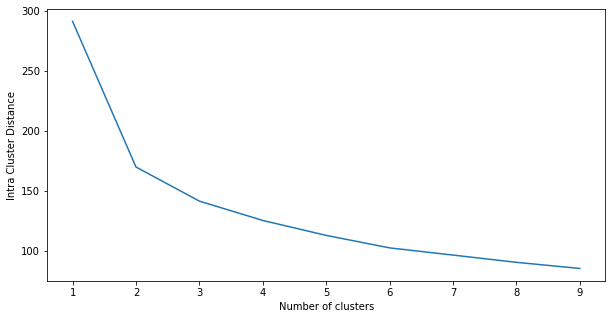

In [47]:
# MINMAX : K = 1...10 - w/o Outliers

sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_min_max_out)
    cluste_labels = kmeans.labels_
    sse[k] = kmeans.inertia_ 

plt.close()
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("No of clusters")
plt.ylabel("Intra Cluster Distance")
plt.show()

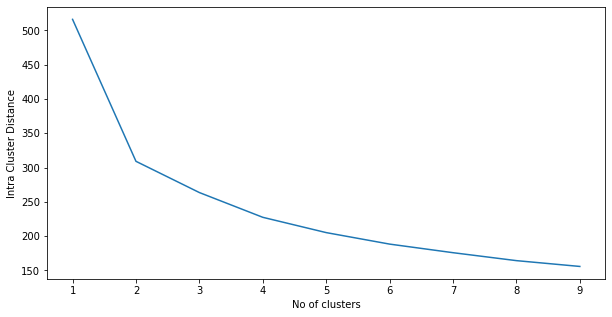

In [48]:
# MINMAX : K = 1...10

sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_min_max)
    cluste_labels = kmeans.labels_
    sse[k] = kmeans.inertia_ 

plt.close()
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("No of clusters")
plt.ylabel("Intra Cluster Distance")

plt.show()

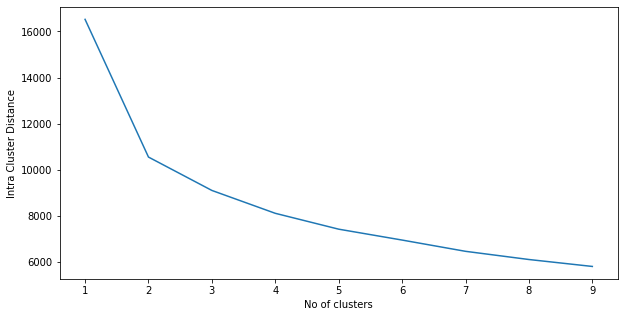

In [49]:
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_stscale_out)
    cluste_labels = kmeans.labels_
    sse[k] = kmeans.inertia_ 
# Inertia je SSE (suma odstojanja elemenata od odgovarajućih centroida)
    
plt.close()
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("No of clusters")
plt.ylabel("Intra Cluster Distance")

plt.show()

#### Traženje optimalnog broja klastera putem Silhouette score-a

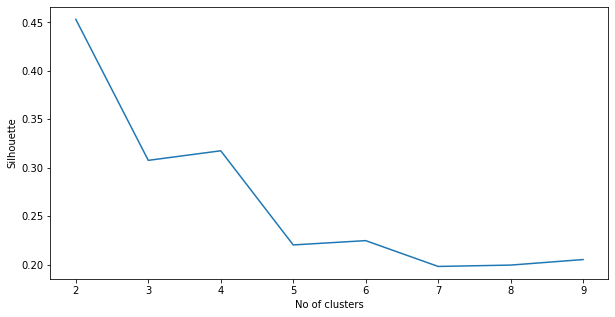

In [50]:
from sklearn.metrics import silhouette_score

sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_min_max)
    cluster_labels = kmeans.fit_predict(df_min_max)
    sse[k] = silhouette_score(df_min_max, cluster_labels)

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("No of clusters")
plt.ylabel("Silhouette")
plt.show()

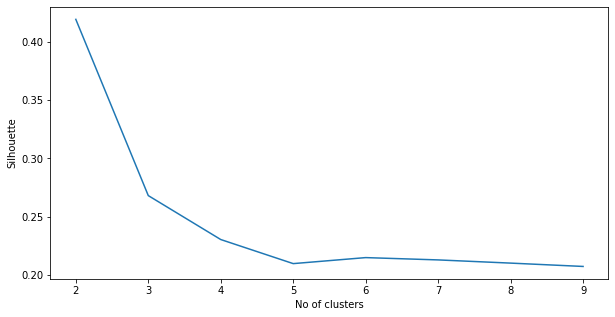

In [51]:
from sklearn.metrics import silhouette_score

sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_min_max_out)
    cluster_labels = kmeans.fit_predict(df_min_max_out)
    sse[k] = silhouette_score(df_min_max_out, cluster_labels)

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("No of clusters")
plt.ylabel("Silhouette")
plt.show()

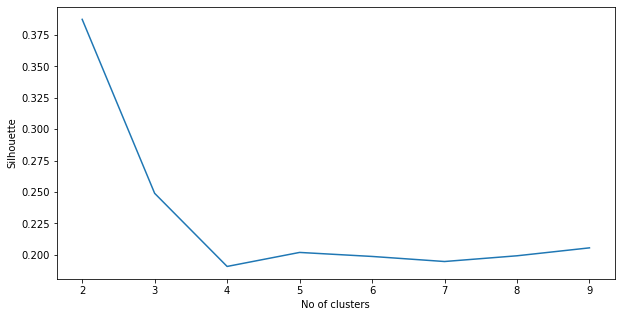

In [52]:
from sklearn.metrics import silhouette_score

sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 100).fit(df_stscale_out)
    cluster_labels = kmeans.fit_predict(df_stscale_out)
    sse[k] = silhouette_score(df_stscale_out, cluster_labels)

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("No of clusters")
plt.ylabel("Silhouette")
plt.show()

#### Vizualizacija Silhouette tehnike

In [53]:
!pip install scikit-plot
import scikitplot as skplt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


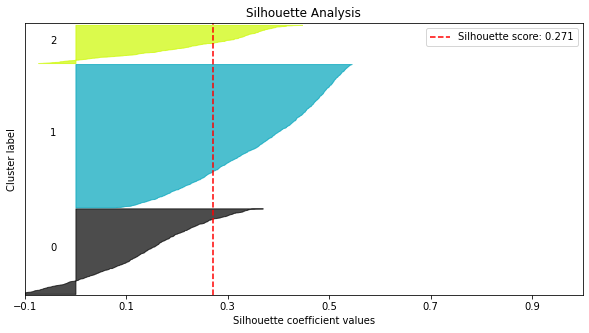

In [54]:
kmeans = KMeans(n_clusters = 3, random_state = 133)
cluster_labels = kmeans.fit_predict(df_min_max_out)
skplt.metrics.plot_silhouette(df_min_max_out, cluster_labels)
plt.show()

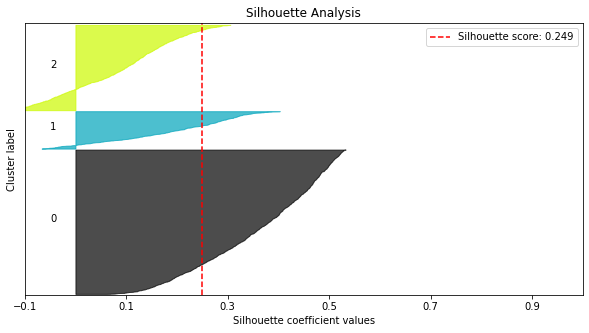

In [55]:
kmeans = KMeans(n_clusters = 3, random_state = 331)
cluster_labels = kmeans.fit_predict(df_stscale_out)
skplt.metrics.plot_silhouette(df_stscale_out, cluster_labels)
plt.show()

In [56]:
# Line chart – prepoznavanje klastera putem linijskog dijagrama

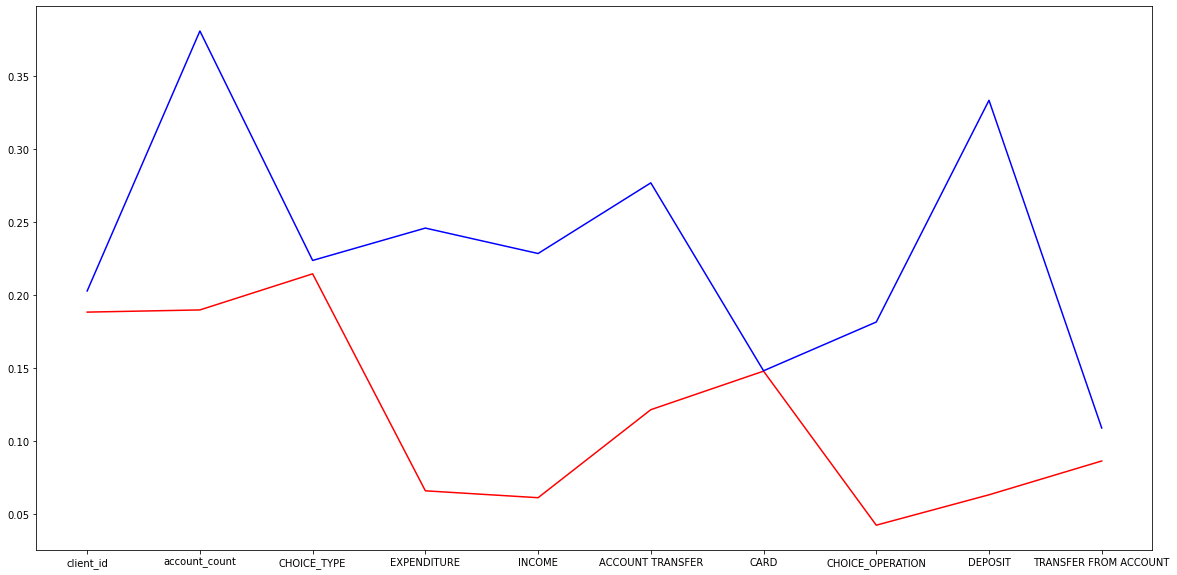

In [57]:
model = KMeans(n_clusters = 2, max_iter = 100).fit(df_min_max_out)
centroids = model.cluster_centers_
cluster_labels = model.predict(df_min_max_out)
centroids

plt.close()
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(centroids[0,:], c = 'r')
plt.plot(centroids[1,:], c = 'b')
plt.xticks(list(range(len(df_min_max_out.columns))), df_min_max_out.columns)
plt.show()

# Rezultati MINMAX normalizacije (SSE)

– C1 – plavi klaster; klijenti koji su odlični po svim vrednostima atributa; imaju malo veće depozite, prenose sa računa, karticu koriste isto kao i crveni

– C2 – crveni klaster; manje aktivni po svim parametrima

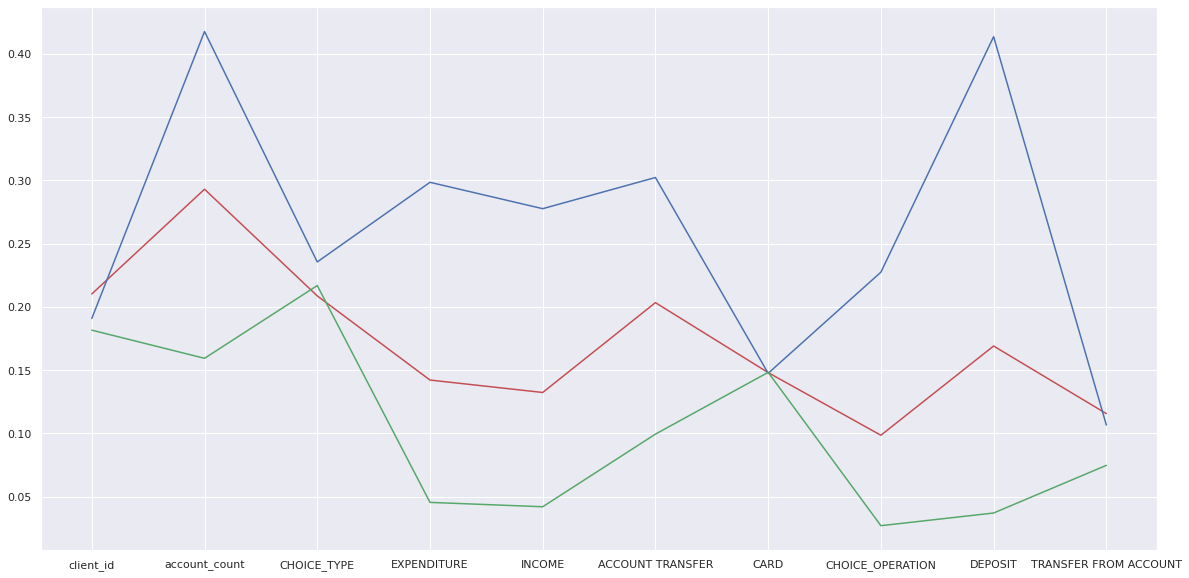

In [79]:
model = KMeans(n_clusters = 3, max_iter = 100).fit(df_min_max_out)
centroids = model.cluster_centers_
cluster_labels = model.predict(df_min_max_out)
centroids

plt.close()
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(centroids[0,:], c = 'r')
plt.plot(centroids[1,:], c = 'b')
plt.plot(centroids[2,:], c = 'g')
plt.xticks(list(range(len(df_min_max_out.columns))), df_min_max_out.columns)
plt.show()

#Rezultati MINMAX normalizacije (Silhouette)

– **C0** – plavi klaster; klijenti koji su prosečni po svim vrednostima atributa; imaju malo veće depozite, prenose sa računa

– **C1** - zeleni klaster; korisnici koji slabo vrše transakcije, najviše korise karticu, nemaju prihode i ne troše novac;

– **C2** – crveni klaster; najaktivniji klijenti; imaju veliki broj računa, troše dosta novca, ne koriste kreditne kartice, imaju depozite. 

In [59]:
# Prvo ćemo dodeliti boju svakoj labeli klastera
cluster_color_map = {0: 'g', 1: 'b', 2: 'r'}

# Zatim ćemo napraviti listu boja za svaku instancu na osnovu klastera
cluster_color = [cluster_color_map[i] for i in cluster_labels]

In [60]:
cl_lab = pd.DataFrame(cluster_labels).head()

In [61]:
def draw_clusters(df, x, y, z, cluster_color, cluster_label, centers):
    plt.close()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.ylabel(z)
    plt.title('Data')
    plt.scatter(df[x], df[y], df[z], c = cluster_color, label = cluster_labels)
    plt.scatter(centers[:, 0], centers[:, 1], marker = '+', s = 200, c = 'black')
    plt.grid()
    plt.show()

In [62]:
df_min_max_out.head()

,client_id,account_count,CHOICE_TYPE,EXPENDITURE,INCOME,ACCOUNT TRANSFER,CARD,CHOICE_OPERATION,DEPOSIT,TRANSFER FROM ACCOUNT
0,0.000000,0.228686,0.228153,0.035848,0.029267,0.085391,0.156420,0.014681,0.006638,0.034497
1,0.000108,0.585757,0.273538,0.291163,0.296440,0.547213,0.156420,0.190646,0.057059,0.397235
2,0.000217,0.259779,0.228153,0.045270,0.045461,0.119203,0.156420,0.016319,0.000312,0.065836
3,0.000325,0.235707,0.228153,0.059639,0.055259,0.163305,0.156420,0.020334,0.000182,0.080636
4,0.000434,0.119358,0.228153,0.111941,0.103181,0.084965,0.037711,0.082424,0.162327,0.108169


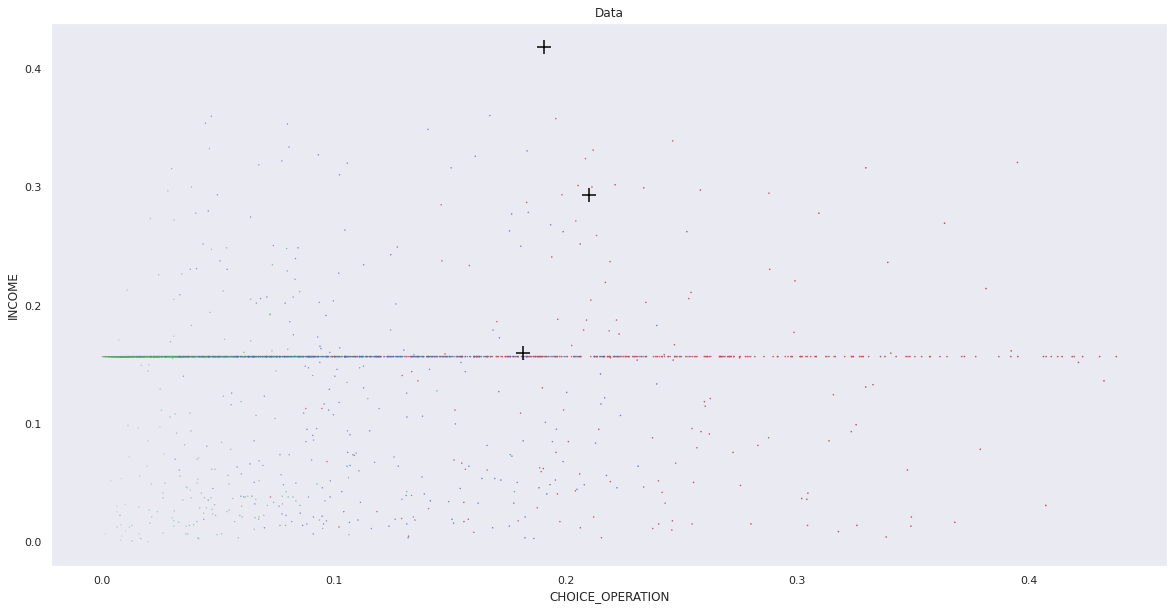

In [85]:
draw_clusters(df_min_max_out, 'CHOICE_OPERATION', 'CARD', 'INCOME',cluster_color, cl_lab, centroids)

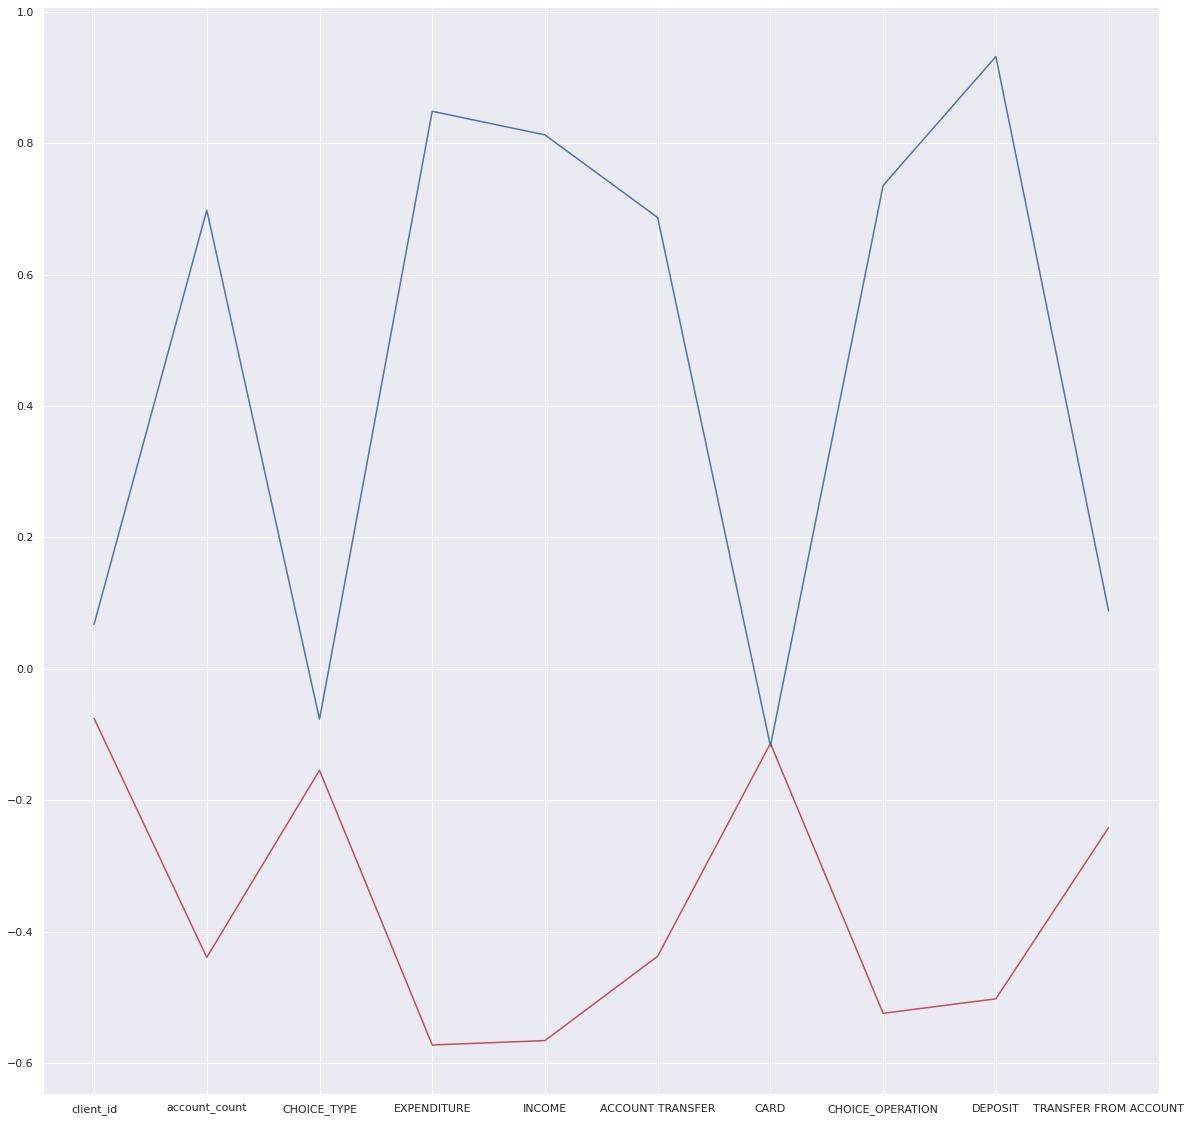

In [87]:
model = KMeans(n_clusters = 2, max_iter = 100).fit(df_stscale_out)
centroids = model.cluster_centers_
cluster_labels = model.predict(df_stscale_out)

centroids

plt.close()
plt.rcParams['figure.figsize'] = [20,20]
plt.plot(centroids[0,:], c = 'r')
plt.plot(centroids[1,:], c = 'b')
plt.xticks(list(range(len(df_stscale_out.columns))), df_stscale_out.columns)
plt.show()

#Rezultati STANDARD SCALE normalizacije (SSE)

– C1 - crveni klaster - imaju velike prihode, ne koriste karticu, deponuju novac.

– C2 – plavi klaster; neaktivni klijenti; koriste karticu, nemaju depozite, ne troše novac.

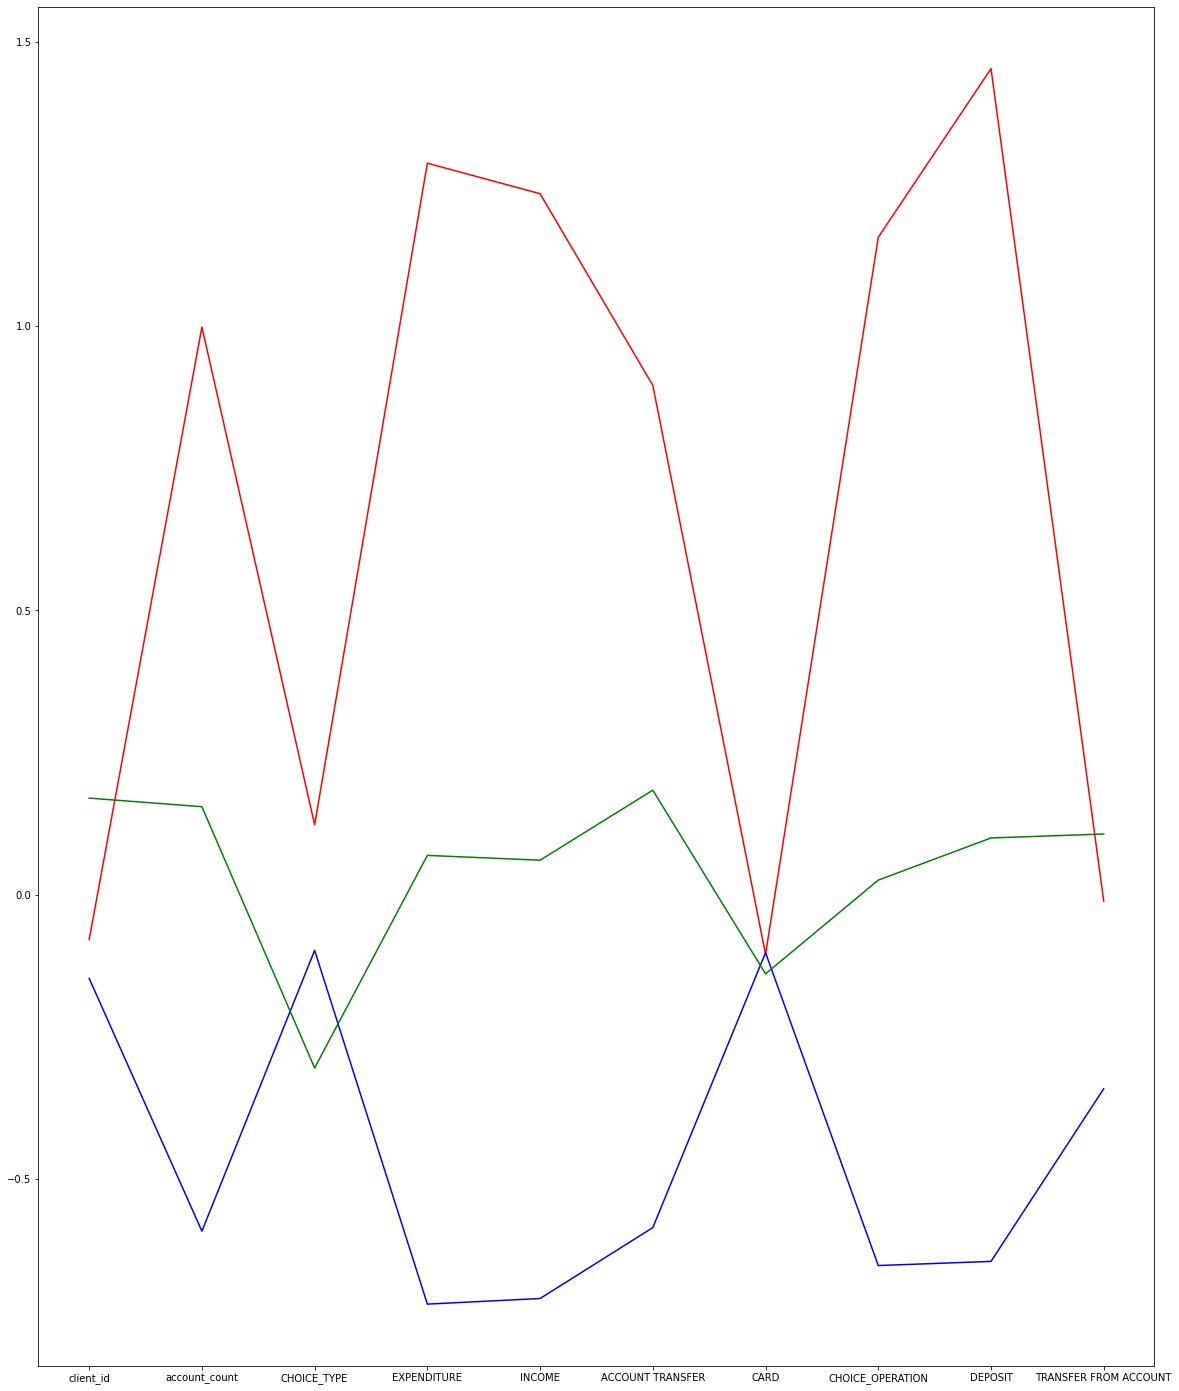

In [65]:
model = KMeans(n_clusters = 3, max_iter = 100).fit(df_stscale_out)
centroids = model.cluster_centers_
cluster_labels = model.predict(df_stscale_out)

centroids

plt.close()
plt.rcParams['figure.figsize'] = [20, 25]
plt.plot(centroids[0,:], c = 'r')
plt.plot(centroids[1,:], c = 'b')
plt.plot(centroids[2,:], c = 'g')
plt.xticks(list(range(len(df_stscale_out.columns))), df_stscale_out.columns)
plt.show()

#### Rezultati STANDARD SCALE normalizacije (Silhouette)

– C0 – zeleni klaster - srednji; imaju prosečne prihode, bolji su od svih po pitanju korišćenja kartice.

– C1 - crveni klaster - imaju velike prihode, ne koriste karticu, deponuju novac.

– C2 – plavi klaster; neaktivni klijenti; koriste karticu, nemaju depozite, ne troše novac.

## Hijerarhijsko klasterovanje
### Dendogram

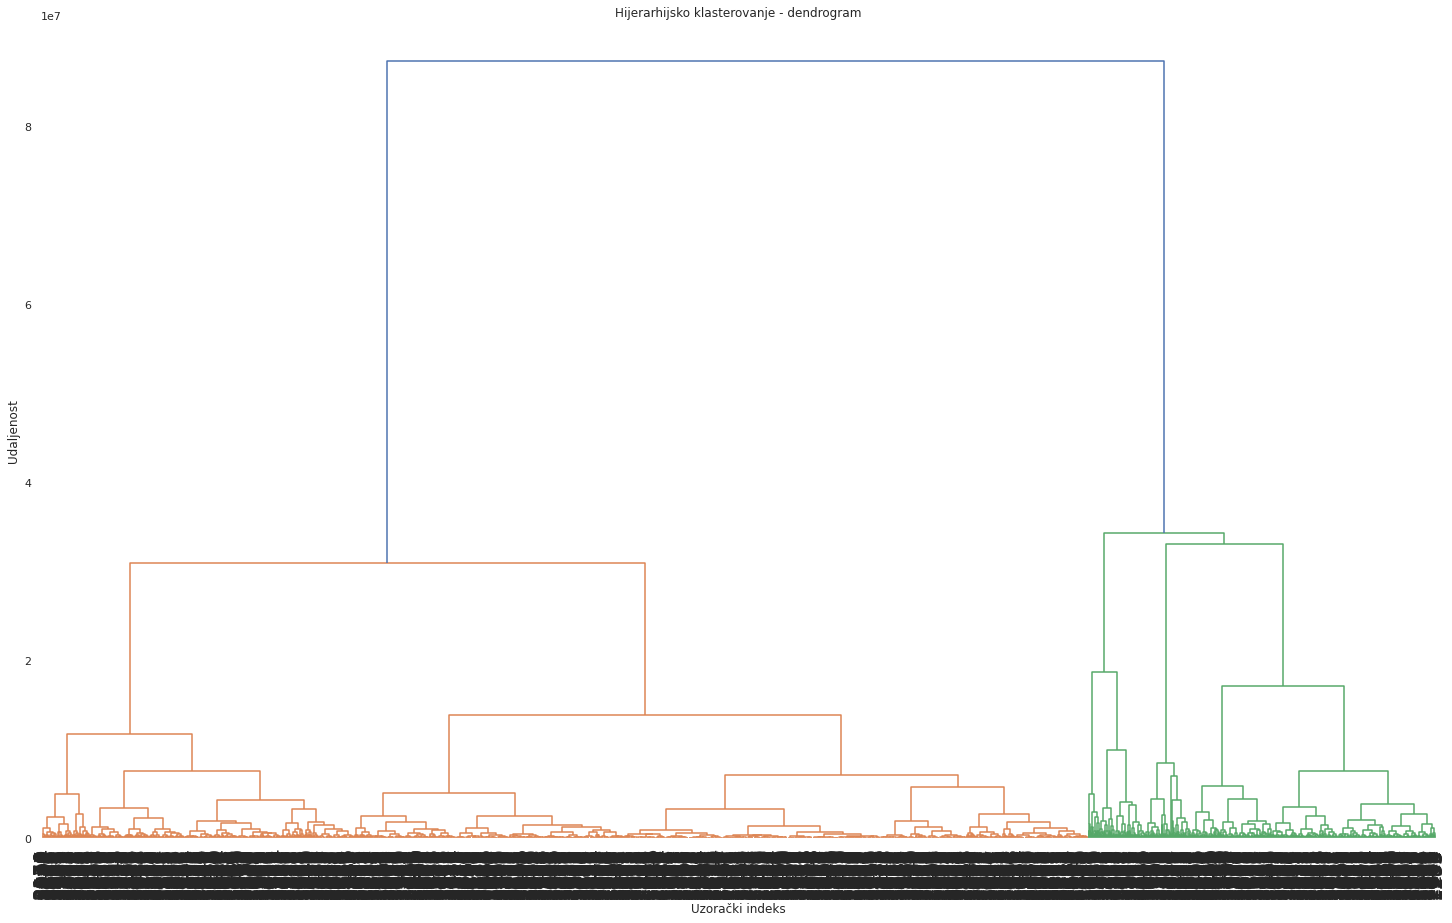

In [91]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_clustering, 'ward')
plt.figure(figsize = (25, 15))
plt.title('Hijerarhijsko klasterovanje - dendrogram')
plt.xlabel('Uzorački indeks')
plt.ylabel('Udaljenost')
dendrogram(
    Z,
    leaf_rotation = 90.,  # rotira drvo
    leaf_font_size = 20.,  # veličina fonta
)
plt.show()

In [67]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage = 'ward', n_clusters = 3)
clustering.fit(df_clustering)
print(clustering.labels_)

[1 2 1 ... 1 2 1]


/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


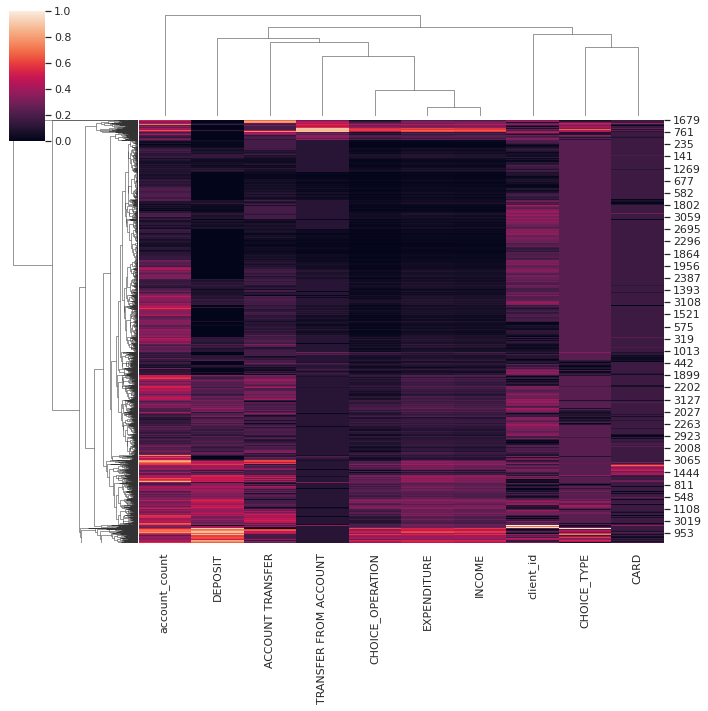

In [68]:
import seaborn as sns
sns.set(color_codes = True)

g = sns.clustermap(df_min_max, method = "average")

/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


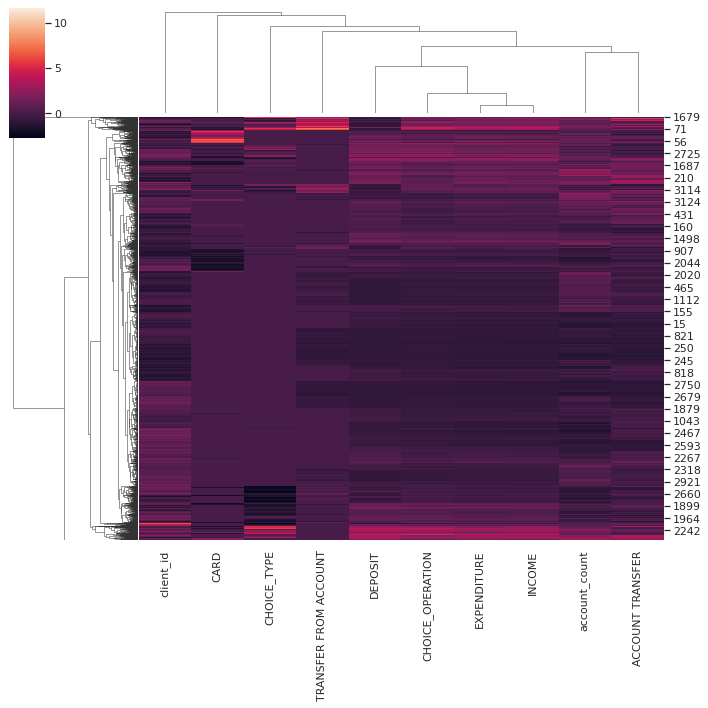

In [69]:
import seaborn as sns
sns.set(color_codes = True)

g = sns.clustermap(df_stscale, method = "average")

In [93]:
#!pip install fastcluster

import fastcluster as fc



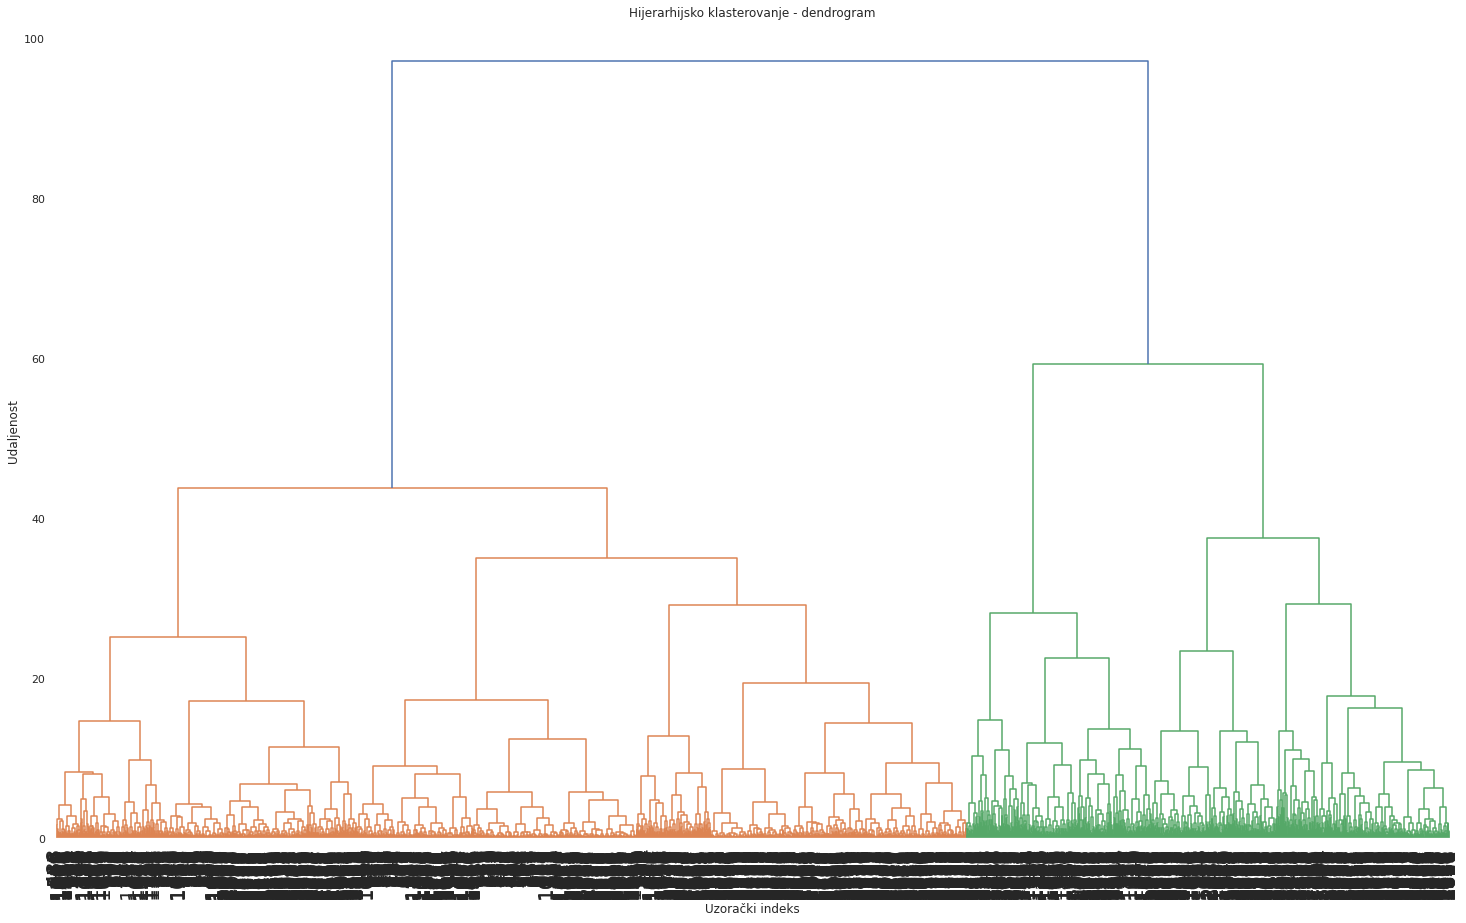

In [95]:
'''clustering_fc = fc.linkage(df_stscale_out,  method = 'ward', metric = 'euclidean', preserve_input=True)
clustering_fc_df = pd.DataFrame(clustering_fc)
g = sns.clustermap(clustering_fc_df, method = "average")'''

Z = fc.linkage(df_stscale_out,  method = 'ward', metric = 'euclidean', preserve_input=True)
plt.figure(figsize = (25, 15))
plt.title('Hijerarhijsko klasterovanje - dendrogram')
plt.xlabel('Uzorački indeks')
plt.ylabel('Udaljenost')
dendrogram(
    Z,
    leaf_rotation = 90.,  # rotira drvo
    leaf_font_size = 20.,  # veličina fonta
)
plt.show()